### Introduction
Map projection is necessary to render the three-dimensional globe a flat surface. Here we will use coordinate reference system (CRS) to show how the projected points correspond to real locations on Earth.

#### Setting the CRS
When we create a GeoDataFrame froma a shpaefile, the CRS is already imported for us.

In [12]:
# loading geoDataFrame containing regions in Ghana
import geopandas as gpd
regions = gpd.read_file(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\ghana\ghana\Regions\Map_of_Regions_in_Ghana.shp')
print(regions.crs)

epsg:32630


Here we see epsg which stands for European Petroleum Survey Group. CRS is referenced by epsg codes. epsg 32630 is also called the 'Mercator' projection. This projection preserves angles (making it uselful for sea navigation) and slighlty distors area.

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS manually. EPSG 4326 corresponds to coordinates in latitude and longitude.

In [13]:
regions.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


In [5]:
# reading csv data in panda dataframe
import pandas as pd
df_facilities = pd.read_csv(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\ghana\ghana\health_facilities.csv')
df_facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [4]:
# convert the pandas dataframe into geodataframe by gpd.GeoDataFrame()
# gpd.point_from_xy() function creats Point object from latitude and longitude columns
gdf_facilities = gpd.GeoDataFrame(df_facilities,
                                 geometry = gpd.points_from_xy(df_facilities.Longitude, df_facilities.Latitude))

# set the coordinate reference system (CRS) to EPSG 4326
gdf_facilities.crs = {'init': 'epsg:4326'}

gdf_facilities.head()

C:\Users\Rabbil\anaconda3\envs\geopandas_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


### Re-projecting using to_crs() method

Re-projecting refers to the process of changing the CRS. When you have multiple GeoDataFrames, it is important that they all use the same CRS. In our first region GeoDataFrame, we have epsg code. So we need to change the gpd_facilities GeoDataFrame to same CRS code. Then we plot the maps.

<AxesSubplot:>

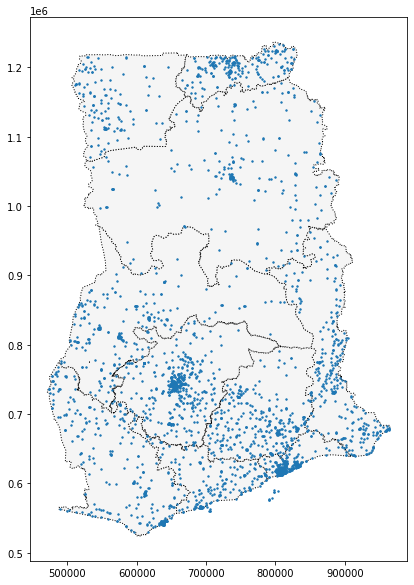

In [8]:
# Creating a map
# first create a map for regions geodataframe which has boundary object using ax
ax = regions.plot(figsize=(10,10), color= 'whitesmoke', linestyle=':', edgecolor='black')

# plotting second map after applying to_crs() method
gdf_facilities.to_crs(epsg=32630).plot(ax=ax, markersize=2)

The to_crs() method modifies only the 'geometry' column and all other columns are left as they are.

In [10]:
# the latitude and longitude columnns are unchanged
gdf_facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


### proj4 string
In case of epsg code is not available in geopandas, we can change the crs with 'proj4 string' of the CRS.

In [11]:
# change the cRS to EPSG 4326 using proj4 string
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()


,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


### Attributes of geometric objects
The type in the geometry column depends on what we are trying to show e.g
    - a Point for the epicenter of an earthquake
    - a LineString for a stree 
    - a Polygon to show country boundaries 
 
 All three types of geometric objects have built-in attributes in geoDataFrame
 

In [16]:
# get the x-coordinate of the each point
gdf_facilities.geometry.x.head()


0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [17]:
gdf_facilities.geometry.y.head()

0    7.40801
1    6.46312
2    6.22393
3    6.84177
4    6.84177
dtype: float64

In [18]:
# calculate the area of each polygon in the geodataframe

regions['Area'] = regions.geometry.area / 10**6

print('Area of Ghana: {} square kilometers'.format(regions.Area.sum()))
print('CRS:', regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,Area
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
